In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [2]:
# pattern 2
cep_one_phase_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\pattern_2\\flink_job_pattern2-cep-one-phase_result_test_runner_vai_03_17_18_05.xlsx"
cep_three_phase_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\pattern_2\\flink_job_pattern2-cep-three-phase_result_test_runner_vai_03_17_18_05.xlsx"

sp_one_phase_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\pattern_2\\Pattern2onejobSP\\Pat2fixOnepLat.xlsx"
sp_three_phase_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\pattern_2\\Pattern2onejobSP\\Pat2fixThreepLat.xlsx"


# Define the columns and row range
columns = ["B", "D", "F", "H", "J"]

start_row = 2

In [3]:
custom_palette = {
    "LatP9": "#FFDAB9",  # light orange
    "LatP6": "#90EE90",  # light green
    "LatP3": "#ADD8E6",  # light blue
    "LatP1": "#FF7F7F",  # light red
}

In [4]:
def extract_data(file_path, label, end_row, excel_sheets):
    wb = load_workbook(filename=file_path, data_only=True)
    records = []
    for sheet_name in excel_sheets:
        sheet = wb[sheet_name]
        for col in columns:
            for row in range(start_row, end_row + 1):
                val = sheet[f"{col}{row}"].value
                if val is not None:
                    records.append(
                        {"Latency": val, "Parallelism": sheet_name, "System": label}
                    )
    return pd.DataFrame(records)

In [5]:
def load_data(plot_pt):
    df_cep_one = extract_data(cep_one_phase_file_path, "CEP One", 1278, plot_pt)
    df_cep_one["Side"] = "Left"
    df_cep_three = extract_data(cep_three_phase_file_path, "CEP Three", 601, plot_pt)
    df_cep_three["Side"] = "Left"

    df_sp_one = extract_data(sp_one_phase_file_path, "SP One", 3724, plot_pt)
    df_sp_one["Side"] = "Right"
    df_sp_three = extract_data(sp_three_phase_file_path, "SP Three", 1790, plot_pt)
    df_sp_three["Side"] = "Right"

    return pd.concat(
        [df_cep_one, df_cep_three, df_sp_one, df_sp_three], ignore_index=True
    )

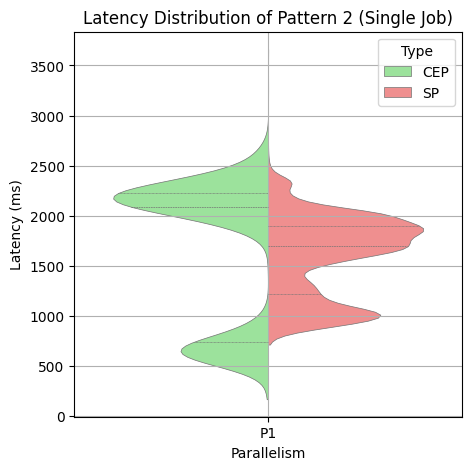

In [6]:
df_all = load_data(["LatP1"])

plt.figure(figsize=(5, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    hue="Side",
    data=df_all,
    split=True,
    inner="quart",
    palette={
        "Left": "#90EE90",  # light green
        "Right": "#FF7F7F",  # light red
    },
    linewidth=0.5,
    cut=0
)

plt.title("Latency Distribution of Pattern 2 (Single Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0], labels=["P1"])

handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = ["CEP", "SP"]
plt.legend(handles[:2], custom_legend, title="Type")
plt.grid(True)
plt.show()

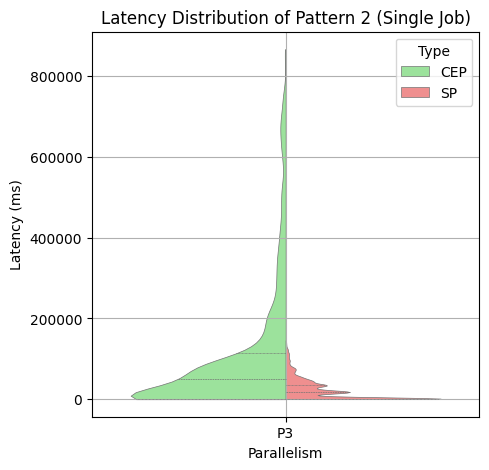

In [7]:
df_all = load_data(["LatP3"])

plt.figure(figsize=(5, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    hue="Side",
    data=df_all,
    split=True,
    inner="quart",
    palette={
        "Left": "#90EE90",  # light green
        "Right": "#FF7F7F",  # light red
    },
    linewidth=0.5,
    cut=0
)

plt.title("Latency Distribution of Pattern 2 (Single Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0], labels=["P3"])

handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = ["CEP", "SP"]
plt.legend(handles[:2], custom_legend, title="Type")
plt.grid(True)
plt.show()

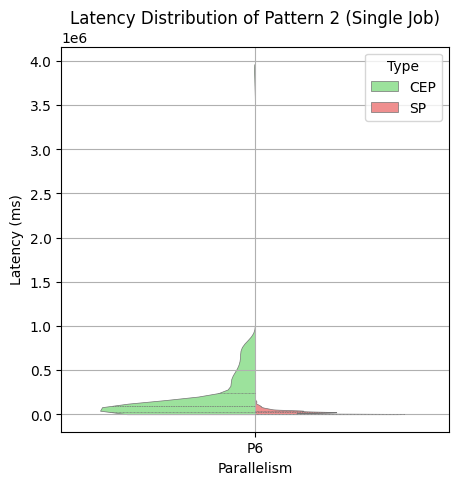

In [8]:
df_all = load_data(["LatP6"])

plt.figure(figsize=(5, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    hue="Side",
    data=df_all,
    split=True,
    inner="quart",
    palette={
        "Left": "#90EE90",  # light green
        "Right": "#FF7F7F",  # light red
    },
    linewidth=0.5,
    cut=0
)

plt.title("Latency Distribution of Pattern 2 (Single Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0], labels=["P6"])

handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = ["CEP", "SP"]
plt.legend(handles[:2], custom_legend, title="Type")
plt.grid(True)
plt.show()

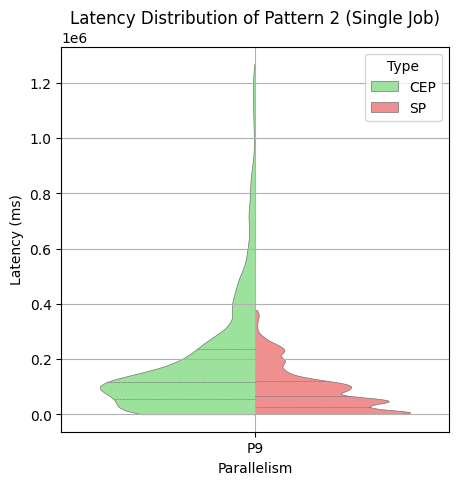

In [9]:
df_all = load_data(["LatP9"])

plt.figure(figsize=(5, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    hue="Side",
    data=df_all,
    split=True,
    inner="quart",
    palette={
        "Left": "#90EE90",  # light green
        "Right": "#FF7F7F",  # light red
    },
    linewidth=0.5,
    cut=0
)

plt.title("Latency Distribution of Pattern 2 (Single Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0], labels=["P9"])

handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = ["CEP", "SP"]
plt.legend(handles[:2], custom_legend, title="Type")
plt.grid(True)
plt.show()